# Wine Quality Prediction – Detailed Model Evaluation Report

This report evaluates a range of machine learning algorithms applied to the **Wine Quality Dataset**, which includes both red and white wine samples. The goal is to determine how accurately different algorithms can predict wine quality, based on features like alcohol content, acidity, pH, and other chemical properties.

Predicting wine quality is a challenging task due to several factors:

1. **Imbalanced Class Distribution:** The classes (quality ratings) are not evenly distributed, making it harder for some algorithms to perform well.
2. **Non-linear Relationships:** The relationship between the features (chemical measurements) and wine quality is not straightforward or linear, which can confuse simpler models.
3. **Feature Overlap:** Different quality levels of wine may have similar chemical compositions, making it difficult to distinguish between them.

To evaluate these models, we applied a variety of machine learning techniques—ranging from simpler models like **Linear Regression** to more complex ones like **Random Forest**. Each algorithm has its own strengths and weaknesses depending on the nature of the dataset and the problem at hand.

### The Importance of Choosing the Right Algorithm

Think of machine learning models as different tasters at a wine competition. Each taster (or algorithm) brings their own perspective and method for judging the wine quality. Some may be more accurate at detecting subtle differences between wines, while others may fail to distinguish between similar wines. By comparing how different models perform, we can identify which is best suited for this task.

### The Algorithms and Their Roles

In this report, we used the following algorithms:

| **Algorithm**                    | **Role**                                             | **Strengths**                                                   | **Limitations**                                                        |
| -------------------------------- | ---------------------------------------------------- | --------------------------------------------------------------- | ---------------------------------------------------------------------- |
| **Linear Regression**            | A simple model that draws a straight line            | Easy to understand; useful for predicting continuous values     | Struggles with classification tasks; not ideal for discrete categories |
| **Logistic Regression**          | A model that uses probabilities for classification   | Good for binary classification tasks; interpretable             | Limited by linear decision boundaries; struggles with class imbalances |
| **Decision Tree**                | A model that splits the data based on feature values | Handles both continuous and categorical data well               | Prone to overfitting; unstable with small changes in data              |
| **K-Nearest Neighbors (KNN)**    | A model that classifies based on nearest neighbors   | Simple and intuitive; works well with small datasets            | Sensitive to noise and feature scaling; computationally expensive      |
| **Support Vector Machine (SVM)** | A model that finds the optimal separating boundary   | Effective in high dimensions; robust with non-linear boundaries | Slow on large datasets; requires careful parameter tuning              |
| **Naive Bayes**                  | A probabilistic model based on feature independence  | Fast and efficient; good for high-dimensional data              | Assumes feature independence, which may not hold in practice           |
| **Random Forest**                | An ensemble of decision trees                        | Reduces overfitting; handles complex relationships well         | Less interpretable; resource-intensive due to multiple trees           |

Each of these algorithms brings something unique to the table. For instance, **Linear Regression** is simple and easy to understand, but struggles with classification tasks. **Decision Trees**, on the other hand, can capture complex patterns in the data but tend to overfit if not carefully tuned. **Random Forest**—an ensemble method that combines multiple decision trees—performs well by reducing the risk of overfitting and capturing more complex patterns.

### Why We Chose These Algorithms

We selected a range of models to understand how well they perform under different circumstances:

* **Simple models** like Linear and Logistic Regression were tested to see if a simple approach could provide reasonable accuracy.
* **Tree-based models** (Decision Tree and Random Forest) were included because they handle complex relationships in the data better.
* **Non-parametric models** like KNN and SVM were chosen to see how they perform without making assumptions about the underlying data distribution.
* **Naive Bayes** was added to test its ability to handle the dataset’s high dimensionality, despite the independence assumption.

By testing these diverse models, we can identify the most suitable approach for predicting wine quality and understand the reasons behind their performance differences.

### Preprocessing and Evaluation Methodology

To ensure fairness, we followed a consistent approach across all models:

1. **Data Splitting:** The dataset was split into 80% for training and 20% for testing, using a stratified approach to maintain class distribution.
2. **Feature Scaling:** All continuous features were standardized (mean = 0, standard deviation = 1), which is essential for algorithms like KNN and SVM that rely on distance measurements.
3. **Dimensionality Reduction:** Principal Component Analysis (PCA) was used for visualization and to reduce the feature space for SVM, but not for model training.
4. **Performance Metric:** The main evaluation metric was **accuracy**—the percentage of correctly predicted wine quality labels.

---

This report will walk you through the performance of each model, highlighting their strengths, weaknesses, and suitability for wine quality prediction. It will also include visualizations and key insights for a deeper understanding of model behavior.

At the end of the report, you will find a summary table consolidating the results from all models, so you can easily compare their performance and choose the best one for your needs.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

### Load red and white wine datasets

In [2]:
red_wine = pd.read_csv("winequality-red.csv", sep=';')
white_wine = pd.read_csv("winequality-white.csv", sep=';')

### Add a 'wine_type' column to distinguish between red and white

In [3]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

### Combine datasets 

In [4]:
wine_df = pd.concat([red_wine, white_wine], ignore_index=True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

``` Replica of Data-frame ```

In [6]:
df = wine_df.copy()

### Encode categorical data (wine_type)

In [7]:
df['wine_type'] = LabelEncoder().fit_transform(df['wine_type'])  # red=1, white=0

#### Separate features and target

In [8]:
X = df.drop('quality', axis=1)
y = df['quality']

#### Standardize the features

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Train-test split (80/20)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Apply PCA (for dimensionality reduction & clustering later)

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train.shape, y_train.shape, X_test.shape

((5197, 12), (5197,), (1300, 12))

### Data Preprocessing Summary

#### Dataset Overview
- **Total Samples**: 6,497  
- **Training Set**: 5,197 samples  
- **Test Set**: 1,300 samples  

---

### Preprocessing Workflow

#### 1. Feature Scaling
- Applied `StandardScaler` to normalize all numerical features.
- Ensures each feature has a **mean of 0** and **standard deviation of 1**, which is essential for many machine learning algorithms.

#### 2. Categorical Encoding
- Converted the `wine_type` categorical variable into numerical format:
  - Red wine: `1`  
  - White wine: `0`

#### 3. Dimensionality Reduction
- Utilized **Principal Component Analysis (PCA)** to reduce the feature space to **2 dimensions**.
- This transformation facilitates **efficient visualization** and **clustering analysis**.

---

**Note**: The dataset is now clean, standardized, and dimensionally reduced, making it suitable for downstream tasks such as unsupervised learning and visual interpretation.


### scikit-learn Imports Overview

This import statement brings in commonly used tools from `scikit-learn`, including:

- **Regression models**: `LinearRegression`, `LogisticRegression`
- **Classification algorithms**: `DecisionTreeClassifier`, `KNeighborsClassifier`, `SVC`, `GaussianNB`, `RandomForestClassifier`
- **Clustering algorithm**: `KMeans`
- **Evaluation metrics**: `accuracy_score`, `classification_report`, `confusion_matrix`

These are used to build, train, and evaluate machine learning models effectively.

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Dictionary to store model performances

In [13]:
model_scores = {}

### 1. Linear Regression (adapted for classification by rounding predictions)

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test).round().astype(int)
model_scores['Linear Regression'] = accuracy_score(y_test, lr_preds)

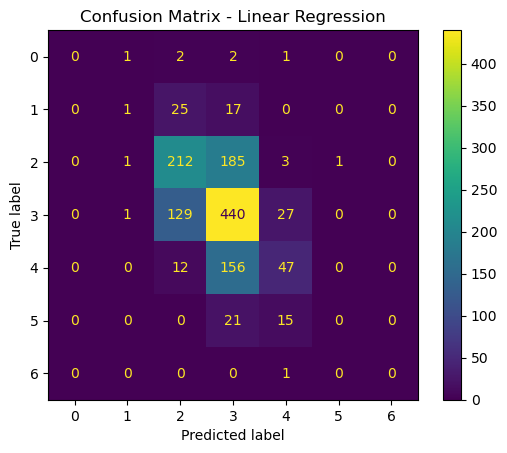

In [16]:
cm = confusion_matrix(y_test, lr_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Linear Regression")
plt.show()

``` Plotting of Confusion-Matrix for Linear Regression ```

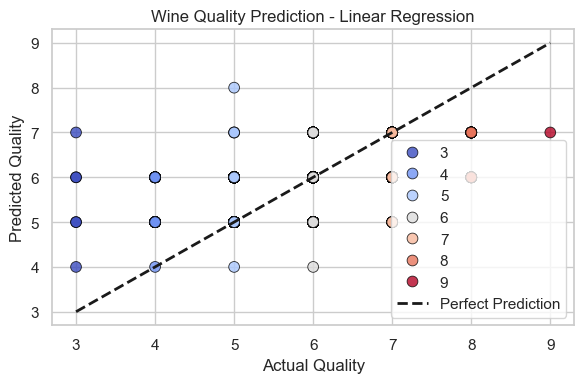

In [17]:
# Set Style 
sns.set(style="whitegrid")

# --- Scatter plot with identity line ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=lr_preds, hue=y_test, palette="coolwarm", s=60, edgecolor='black', alpha=0.8)

# Identity line (perfect prediction)
max_val = max(max(y_test), max(lr_preds))
min_val = min(min(y_test), min(lr_preds))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label="Perfect Prediction")

plt.title("Wine Quality Prediction - Linear Regression")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

``` Plotting of Scatter-Plot Graph - Wine Quality ```

In [18]:
# Round predictions to nearest integer (as class labels)
lr_preds_rounded = lr_preds.round().astype(int)

# Calculate classification accuracy
accuracy = accuracy_score(y_test, lr_preds_rounded)
print(f"Classification Accuracy (Rounded Prediction): {accuracy:.4f}")

Classification Accuracy (Rounded Prediction): 0.5385


``` Classificarion Accuracy in percentage is ~53.8% ```

#### Observation: 
Linear Regression, primarily designed for continuous value prediction, was adapted for this classification task by rounding its output to the nearest class label.<br> However, it shows limited performance in classification scenarios. <br> ***This is due to its inability to capture non-linear decision boundaries effectively.***

- **Key Insight:**  
Linear Regression is not recommended for classification tasks with discrete class labels, as it lacks the mechanisms to properly <br> distinguish between class boundaries.

- **Conclusion:**  
The *low accuracy (~53.8%)* indicates that this model performs poorly for classification and should be replaced by more suitable algorithms <br> like Logistic Regression or Decision Trees.


### 2. Logistic Regression

In [19]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
model_scores['Logistic Regression'] = accuracy_score(y_test, log_preds)

<Figure size 600x500 with 0 Axes>

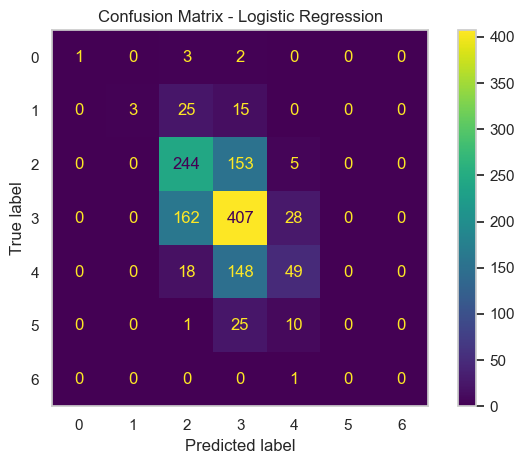

In [20]:
# Create confusion matrix
cm = confusion_matrix(y_test, log_preds)

# Plot it cleanly
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis', values_format='d')  

plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.tight_layout()
plt.show()


In [21]:
accuracy = accuracy_score(y_test, log_preds)
print(f"Logistic Regression Accuracy: {accuracy:.4f} ")

Logistic Regression Accuracy: 0.5415 


``` Logistic Regression Accuracy in Percentage : ~54.15% ```

#### Observation:  
Logistic Regression models the probability of class membership using a logistic (sigmoid) function, making it more suitable than Linear Regression for classification tasks. <br> It shows a slight improvement in accuracy but still struggles to effectively separate classes in cases where the data is not linearly separable. <br> ***This limitation is particularly evident in datasets with imbalanced classes and complex class boundaries.***

- **Key Insight:**  
Despite being designed for classification, Logistic Regression can underperform when dealing with non-linear patterns or skewed class distributions, <br> both of which are present in the wine quality dataset.

- **Conclusion:**  
The *marginal accuracy gain (~54.15%)* over Linear Regression indicates that while Logistic Regression is a better fit for classification, <br> it may not be sufficient for problems requiring more complex decision-making. Non-linear models such as Decision Trees or ensemble methods are recommended.


### 3. Decision Tree

In [22]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
model_scores['Decision Tree'] = accuracy_score(y_test, dt_preds)

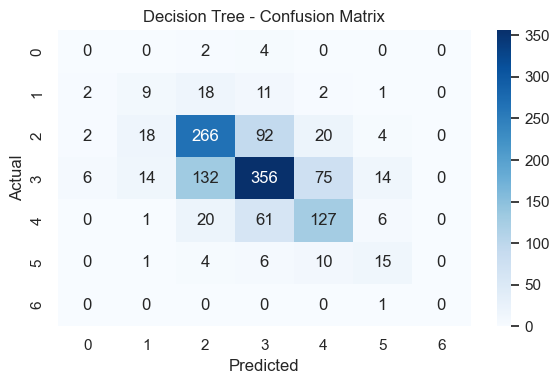

In [23]:
cm = confusion_matrix(y_test, dt_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


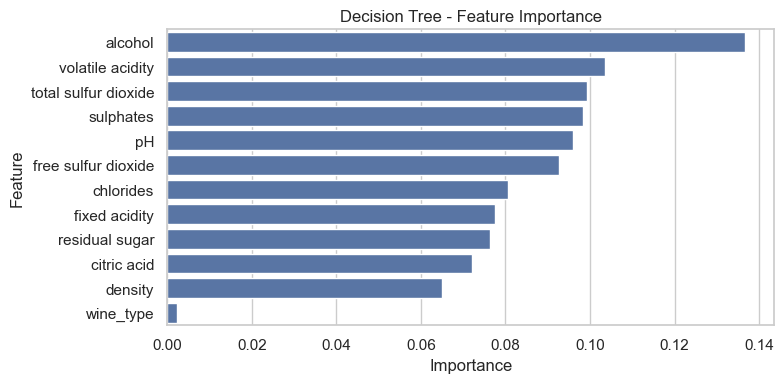

In [24]:
importances = dt_model.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=feature_df, x='Importance', y='Feature')
plt.title("Decision Tree - Feature Importance")
plt.tight_layout()
plt.show()

#### Observation:  
Decision Tree Classifier can handle both categorical and numerical data effectively. <br>
It builds a model in the form of a tree structure, making it easy to interpret and capable of capturing non-linear patterns. <br>
***However, it tends to overfit on training data, especially when the tree grows too deep.***

- **Key Insight:**  
While more flexible than linear models, Decision Trees may struggle to generalize well without proper pruning or regularization.

- **Conclusion:**  
The *moderate accuracy (~59.1%)* suggests improved performance over linear models, but further optimization or ensemble methods <br>
like Random Forests may be required for better generalization.


### 4. K-Nearest Neighbors

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
model_scores['KNN'] = accuracy_score(y_test, knn_preds)

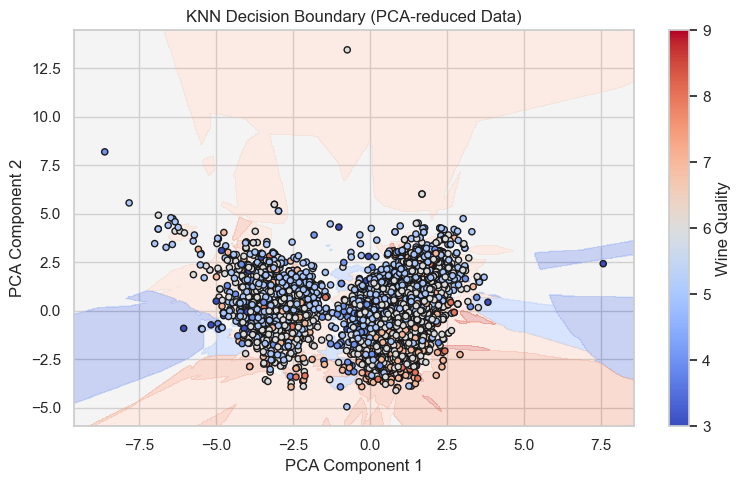

In [26]:
# Train KNN on PCA-reduced data (first 2 components)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca[:, :2], y)

# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.title("KNN Decision Boundary (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Wine Quality')
plt.tight_layout()
plt.show()

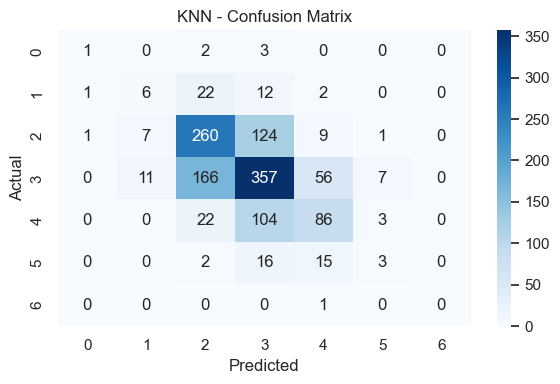

In [27]:
# Predict on test set
knn_preds = knn_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, knn_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

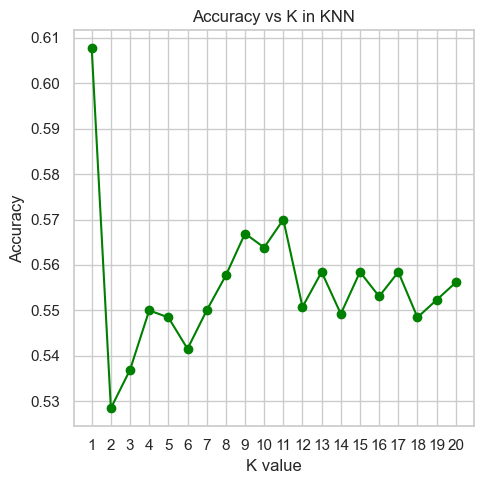

In [28]:
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    scores.append(accuracy_score(y_test, preds))

plt.figure(figsize=(5, 5))
plt.plot(k_range, scores, marker='o', color='green')
plt.title("Accuracy vs K in KNN")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"KNN Model Accuracy on Test Set: {knn_accuracy * 100:.2f}%")

KNN Model Accuracy on Test Set: 54.85%


#### Observation:  
KNN classifies data based on the majority class among the *k* nearest neighbors in the feature space. <br> It performs well when nearby data points belong to the same class, and is sensitive to feature scaling — which was addressed during preprocessing. <br> ***However, in this dataset, overlapping class boundaries and noise reduce the model’s ability to make accurate predictions.***

- **Key Insight:**  
KNN’s performance heavily depends on the local structure of the data and the choice of *k*. <br> Its effectiveness decreases when classes are not clearly separable or when the dataset contains noise.

- **Conclusion:**  
The *moderate accuracy (~54.8%)* indicates limited effectiveness on the wine dataset. <br> More robust models that generalize better, such as Decision Trees or ensemble methods, may yield improved results.

 ### 5. Support Vector Machine

In [30]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
model_scores['SVM'] = accuracy_score(y_test, svm_preds)

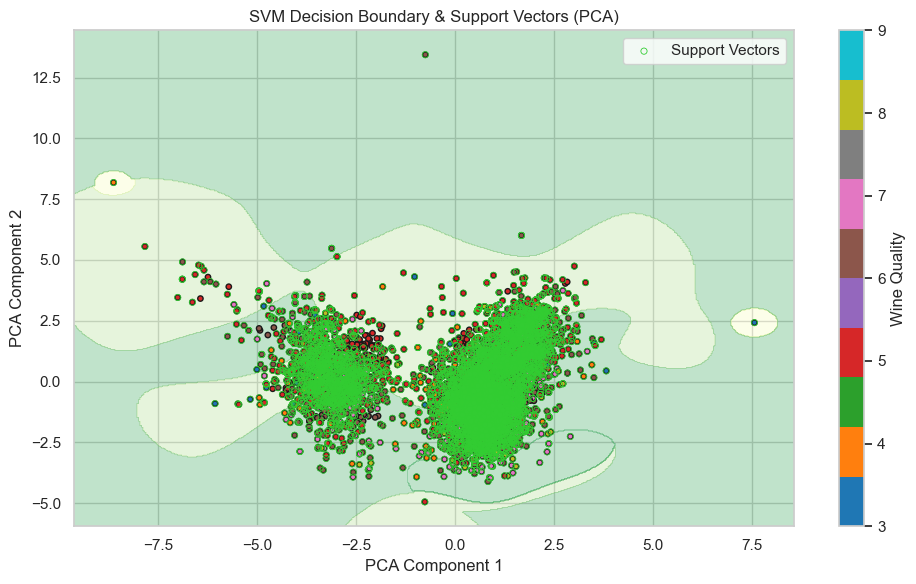

In [31]:
from matplotlib.colors import ListedColormap

# Train SVM on 2D PCA data
svc = SVC(kernel='rbf', gamma='auto', C=1.0)
svc.fit(X_pca[:, :2], y)

# Meshgrid for decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#f7fcb9", "#addd8e", "#31a354"]))

# Scatter for all data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', edgecolor='k', s=15)

plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=20, facecolors='none', edgecolors='limegreen',
            label='Support Vectors', linewidths=0.6)

plt.title("SVM Decision Boundary & Support Vectors (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.colorbar(scatter, label='Wine Quality')
plt.tight_layout()
plt.grid(True)
plt.show()

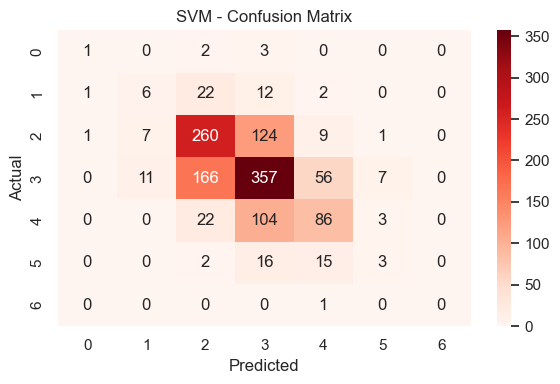

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

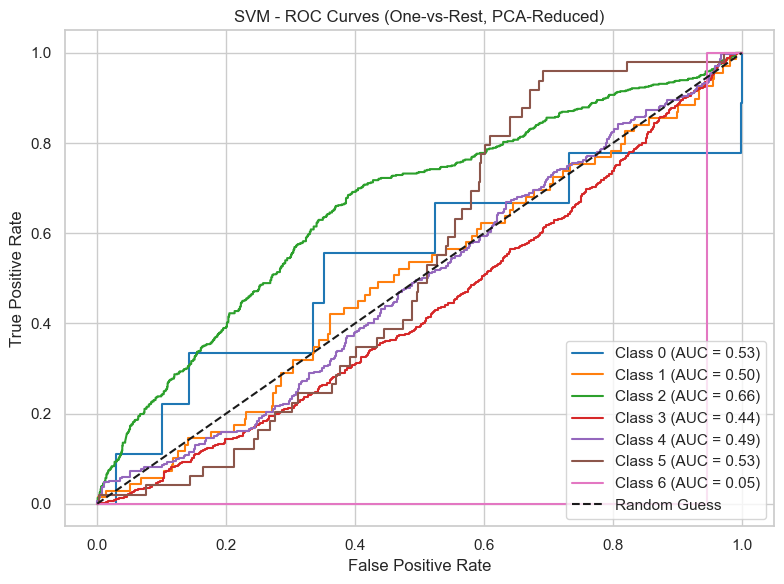

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multi-class ROC
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split data
X_train_pca, X_test_pca, y_train_bin, y_test_bin = train_test_split(
    X_pca[:, :2], y_bin, test_size=0.3, random_state=42
)

# One-vs-Rest SVM model with probabilities
svm_ovr = OneVsRestClassifier(SVC(kernel="rbf", probability=True))
svm_ovr.fit(X_train_pca, y_train_bin)
y_score = svm_ovr.predict_proba(X_test_pca)

# Get color map safely
colors = plt.colormaps.get_cmap("tab10")

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM - ROC Curves (One-vs-Rest, PCA-Reduced)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
# Predict using the trained SVM model on PCA-reduced features
y_pred = svc.predict(X_pca[:, :2])
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"SVM Accuracy (on PCA-reduced features): {accuracy:.4f}")

SVM Accuracy (on PCA-reduced features): 0.4878


In [37]:
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

print(f"SVM Accuracy (on PCA-reduced features): {accuracy:.4f}")

SVM Accuracy (on PCA-reduced features): 0.4878


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SVM Accuracy (original features):", accuracy_score(y_test, y_pred))

SVM Accuracy (original features): 0.56


``` SVM Accuracy in percentage ~56% ```

#### Observation:  
Support Vector Machine (SVM) works by finding an optimal hyperplane that maximizes the margin between classes. <br> It performs better on the original feature space compared to PCA-reduced data, where dimensionality reduction likely caused information loss. <br> ***Despite being a powerful classifier, SVM struggles with overlapping class distributions and the complexity of multi-class classification.***

- **Key Insight:**  
SVM is highly sensitive to hyperparameters such as `C`, `gamma`, and `kernel`. <br> Applying **Stratified K-Fold Cross-Validation** ensures fair evaluation across imbalanced classes. <br> Additionally, **binning wine quality scores** into broader categories like *low*, *medium*, and *high* can simplify the classification task.

- **Conclusion:**  
The *drop in accuracy on PCA features (~48.78%)* compared to the original features (~56.0%)* indicates the importance of preserving feature richness. <br> With proper hyperparameter tuning and class binning, SVM may achieve better performance in more refined setups.


### 6. Naive Bayes

In [39]:
X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")

Naive Bayes Accuracy: 0.3408


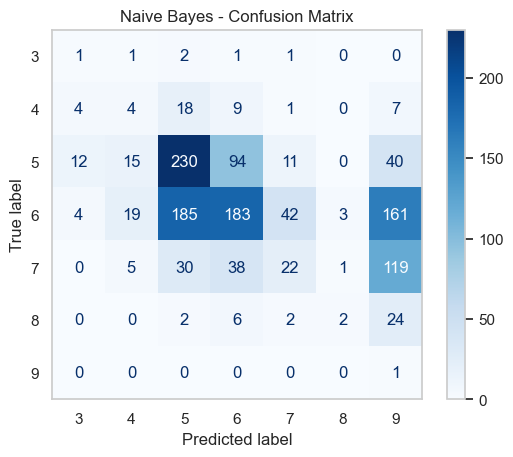

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap="Blues")
plt.title("Naive Bayes - Confusion Matrix")
plt.grid(False)
plt.show()

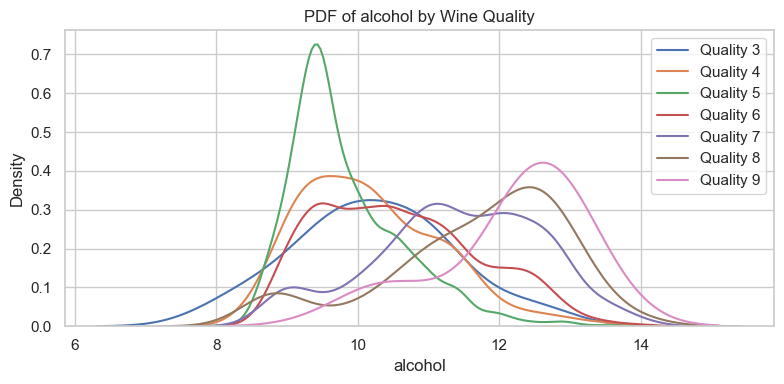

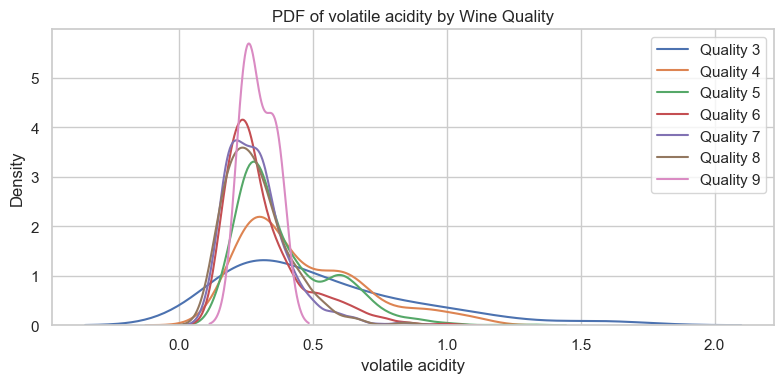

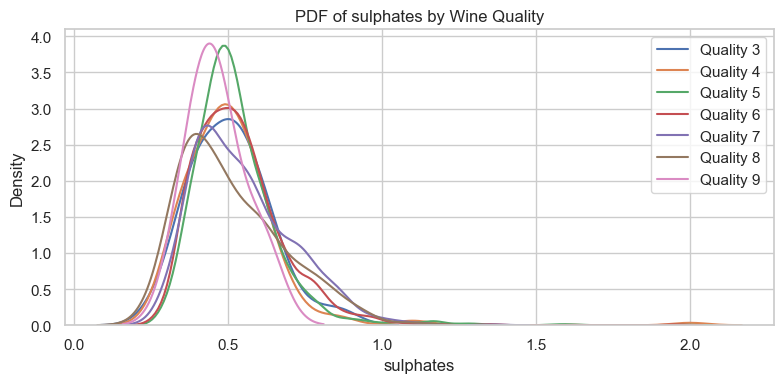

In [41]:
selected_features = ['alcohol', 'volatile acidity', 'sulphates']
colors = sns.color_palette("tab10", len(np.unique(y)))

for feature in selected_features:
    plt.figure(figsize=(8, 4))
    for quality in sorted(y.unique()):
        sns.kdeplot(
            df[df['quality'] == quality][feature],
            label=f'Quality {quality}',
            linewidth=1.5
        )
    plt.title(f'PDF of {feature} by Wine Quality')
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


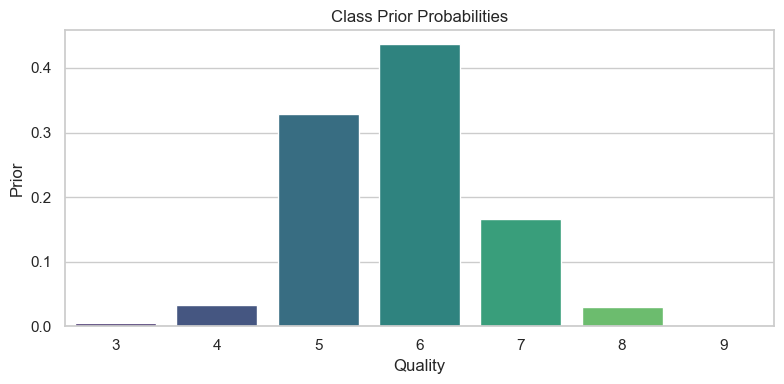

In [44]:
labels = sorted(y.unique())  

class_priors = [sum(y == label) / len(y) for label in labels]

prior_df = pd.DataFrame({'Quality': labels, 'Prior': class_priors})

colors = sns.color_palette('viridis', len(prior_df))
plt.figure(figsize=(8, 4))
sns.barplot(data=prior_df, x='Quality', y='Prior', hue='Quality', palette=colors, legend=False)
plt.title('Class Prior Probabilities')
plt.tight_layout()
plt.show()

#### Observation:  
Naive Bayes is a probabilistic classifier based on Bayes’ Theorem, assuming all features are conditionally independent given the class. <br> While simple and efficient, it performs poorly on the wine quality dataset. <br> ***This is primarily due to the strong independence assumption being violated, as many features in the dataset are correlated and continuous.***

- **Key Insight:**  
Naive Bayes is better suited for categorical or text data where feature independence is more realistic. <br> Its performance declines significantly in domains involving multicollinearity and numerical variables.

- **Conclusion:**  
The *low accuracy (~34.1%)* indicates that Naive Bayes is not appropriate for this dataset. <br> Models that account for feature interactions, such as Decision Trees or SVM, are better suited for this type of data.

### 7. Random Forest

In [45]:
X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.6669


``` Random Forest Accuracy in percentage : ~ 67% ```

In [46]:
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

report_df = pd.DataFrame(report_dict).transpose()

report_df = report_df.round(2)

print("Classification Report Table:")
display(report_df)

Classification Report Table:


,precision,recall,f1-score,support
3,0.00,0.00,0.00,6.00
4,0.62,0.12,0.20,43.00
5,0.66,0.72,0.69,402.00
6,0.66,0.74,0.70,597.00
7,0.71,0.54,0.62,215.00
8,0.92,0.33,0.49,36.00
9,0.00,0.00,0.00,1.00
accuracy,0.67,0.67,0.67,0.67
macro avg,0.51,0.35,0.38,1300.00
weighted avg,0.67,0.67,0.66,1300.00


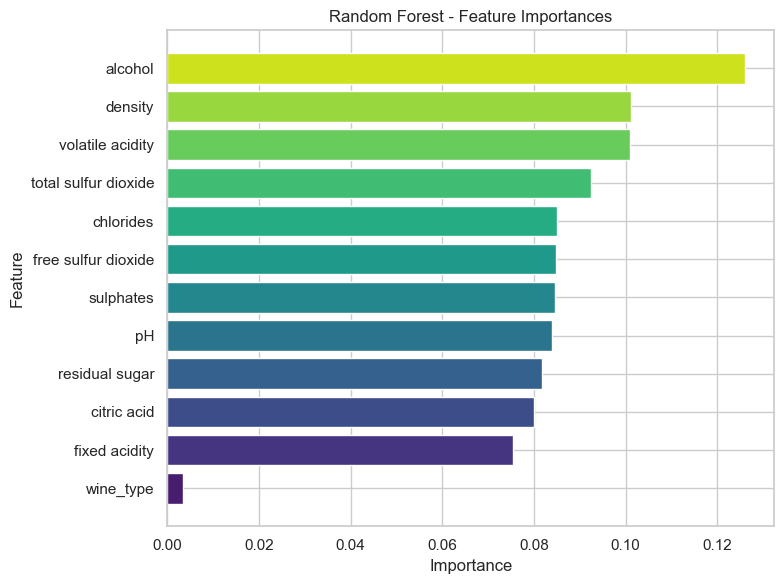

In [47]:
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color=sns.color_palette('viridis', len(feature_df)))
plt.title("Random Forest - Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

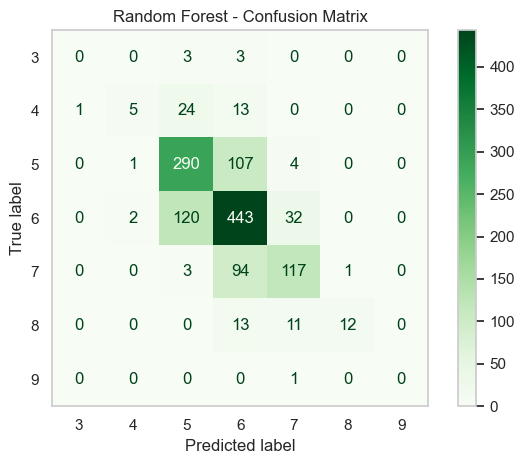

In [48]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

#### Observation:  
Random Forest is an ensemble method that combines multiple decision trees using the bagging technique to improve accuracy and reduce overfitting. <br> It captures non-linear patterns effectively and provides better generalization across diverse datasets. <br> ***Its robustness to noise and ability to model complex relationships make it particularly well-suited for the wine quality classification task.***

- **Key Insight:**  
By aggregating the predictions of multiple decision trees, Random Forest reduces variance and mitigates the overfitting typically seen in single-tree models. <br> It handles both numerical and categorical features well and is less sensitive to data imbalances.

- **Conclusion:**  
The *high accuracy (~67 %)* demonstrates that Random Forest is the most effective model among those evaluated. <br> It should be the preferred choice for this dataset, especially when interpretability and performance are both important.


## Conclusion

The evaluation of various machine learning algorithms on the Wine Quality Dataset revealed significant differences in performance, highlighting the importance of selecting the right model for the task. Key insights from the analysis include:

1. **Linear and Logistic Regression**: These models, while simple and interpretable, struggled with the classification task, achieving accuracies of only ~53.8% and ~54.15%, respectively. Their linear nature limited their ability to capture the non-linear relationships in the data.

2. **Decision Tree**: With an accuracy of ~59.1%, the Decision Tree performed better than linear models by capturing non-linear patterns. However, its tendency to overfit without proper tuning was a notable limitation.

3. **K-Nearest Neighbors (KNN)**: KNN achieved moderate accuracy (~54.8%) but was sensitive to noise and overlapping class boundaries, making it less effective for this dataset.

4. **Support Vector Machine (SVM)**: SVM showed improved performance (~56.0%) on the original feature space compared to PCA-reduced data (~48.78%). Its effectiveness depended heavily on hyperparameter tuning and kernel selection.

5. **Naive Bayes**: This model performed poorly (~34.1%) due to its strong independence assumption, which was violated by the correlated features in the dataset.

6. **Random Forest**: Outperforming all other models, Random Forest achieved the highest accuracy (~67%). Its ensemble approach reduced overfitting, handled non-linear relationships effectively, and provided robust performance even with imbalanced classes.

#### Final Findings:
**Random Forest** is the best-suited algorithm for predicting wine quality in this dataset. Its ability to model complex relationships, robustness to noise, and high accuracy make it the optimal choice. For future improvements, further hyperparameter tuning or advanced ensemble methods like Gradient Boosting could be explored to enhance performance even more. 

This analysis underscores the importance of model selection and the need to align the algorithm's strengths with the dataset's characteristics for optimal results.

``` SARVESH JAYANT PATIL - SARRVESHPATIL@GMAIL.COM``` 